#  N-Dimensional Clusters

Now that we have understood K-means for vectors, let's consider the same method for N-dimensional clusters.

The principle is the same as for vectors, but unlike the vector use case, selection of the $distance function$ is very important.  A list of distance functions that the KMeans functionality supports is here:  http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.spatial.distance.cdist.html.  You can also define your own distance functions.

We start with $K$ random seeds (centers) and measure the $distance$ to each of the points, after which we move the center into the mean of such distances and reevaluate the distances.

Here is a demo of k-means clustering algorithm:  http://shabal.in/visuals/kmeans/1.html

And here are examples of implementation in Python: https://datasciencelab.wordpress.com/2013/12/12/clustering-with-k-means-in-python/

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

With K-means, a lot depends on where clustering starts.  Solutions:

    cross-validation by mini-batching
    choosing multiple random cluster starting points
    kmeans++
    ...    

How kmeans++ works is here:  https://www.youtube.com/watch?v=BIQDlmZDuf8 (**run it at 0.5 the normal speed** - unless you can read $VERY$ fast)

We now proceed to using K-means to split $iris$ data into multi-dimensional clusters

In [2]:
# The standard start of our notebooks
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import re

Load the data set. Clustering belongs to unsupervised learning; so we are not going to need the labels ($iris.target$ is irrelevant; working only with $iris.data$), and we are not breaking the data into training and test sets.

In [3]:
# Load the data, which is included in sklearn.
iris = load_iris()
print ('Iris feature names:', iris.feature_names)
X, Names = iris.data, iris.feature_names

##  Remove the " (cm)" part
pattern = r' \(cm\)'
for nn in np.arange(0,len(Names)):
    Names[nn] = re.sub (pattern, lambda x: "", Names[nn])
print (Names)

print (X.shape)

# Shuffle the data, but make sure that the features and accompanying lalen(bels stay in sync.
np.random.seed(0)  #  To ensure repeatability of results
shuffle = np.random.permutation(np.arange(X.shape[0]))
X = X[shuffle]

Iris feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['sepal length', 'sepal width', 'petal length', 'petal width']
(150, 4)


Let's explore each feature, to see if any grouping exists naturally in each of them.  We'll plot histograms, because boxplots are not sensitive to such groupings.

Back to our data.  If we look at finding the optimal number of clusters as a likelihood-maximization probem, we can use **Information Criteria (*BIC* and *AIC*)** to estimate when we can stop increasing the number: if we are not adding new information by adding one more cluster, we are done.

Now let's look at some 2D combinations of features, just to help us visualize the data:

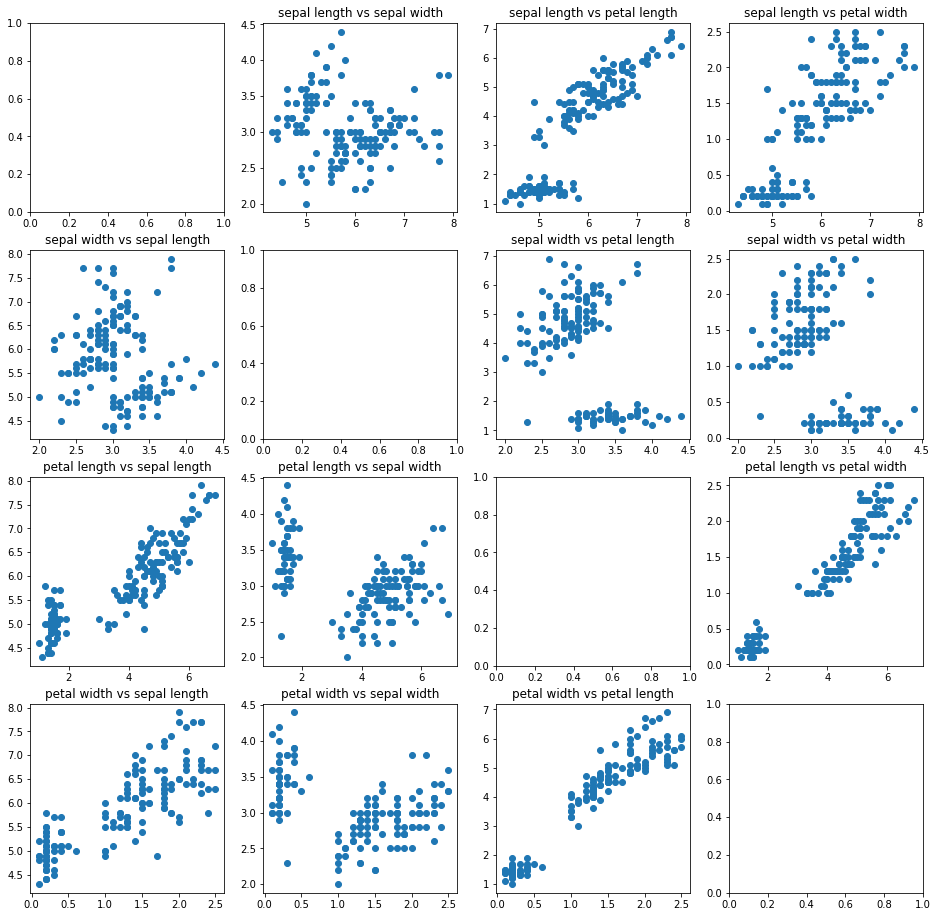

In [4]:
## Bad programming style (spaghetti code), but didn't want to add confusion about looping the features back 
# to the first one
fig, axes = plt.subplots(nrows=X.shape[1], ncols=X.shape[1], sharex=False, sharey=False, figsize = (16, 16))

for f1 in np.arange (X.shape[1]):
    for f2 in np.arange (X.shape[1]):
        if not f1 == f2:
            ax = axes[f1, f2]
            ax.scatter (X[:,f1], X[:,f2])
            ax.set_title (Names[f1] + " vs " + Names[f2])
            
plt.show()

We see that the data naturally fall into 2 clusters for each pair of features.

Let's take one pair (sepal length, sepal width) and see how KMeans works with these two

(1, 2)
[[5.84333333 3.05733333]]
['r']


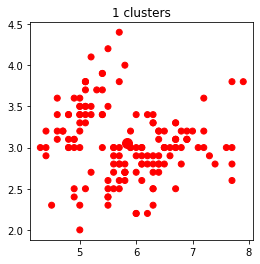

(2, 2)
[[6.51842105 2.94868421]
 [5.15       3.16891892]]
['r' 'g']


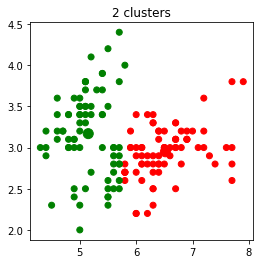

(3, 2)
[[6.81276596 3.07446809]
 [5.006      3.428     ]
 [5.77358491 2.69245283]]
['r' 'g' 'b']


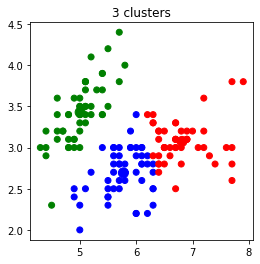

(4, 2)
[[5.1875     3.6375    ]
 [6.85348837 3.1       ]
 [4.76666667 2.89166667]
 [5.90980392 2.73529412]]
['r' 'g' 'b' 'm']


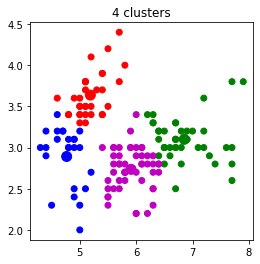

(5, 2)
[[5.1875     3.6375    ]
 [6.54615385 3.04615385]
 [5.83953488 2.70930233]
 [4.76666667 2.89166667]
 [7.475      3.125     ]]
['r' 'g' 'b' 'm' 'c']


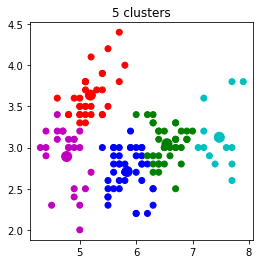

(6, 2)
[[5.268      3.704     ]
 [5.90487805 2.76341463]
 [7.475      3.125     ]
 [5.175      2.40833333]
 [6.57777778 3.05      ]
 [4.75416667 3.1875    ]]
['r' 'g' 'b' 'm' 'c' 'k']


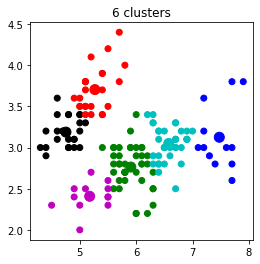

(7, 2)
[[5.72903226 2.67096774]
 [4.828125   3.265625  ]
 [6.86       3.12      ]
 [6.29428571 2.94      ]
 [4.94285714 2.38571429]
 [7.625      3.0875    ]
 [5.37058824 3.8       ]]
['r' 'g' 'b' 'm' 'c' 'k' '0']


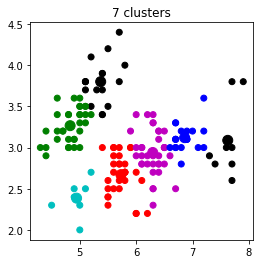

In [5]:
Xpair = X[:,(0,1)]

def Get2DClusters (Xpair, N):
    km = KMeans (n_clusters=N, init='k-means++')
    clstrs = km.fit (Xpair)
    print (clstrs.cluster_centers_.shape)
    print (clstrs.cluster_centers_)

    myColors = ('red', 'green', 'blue', 'magenta', 'cyan', 'k', '0.2', '0.4')
    if N > 8:
        return clstrs
    
    myClCols = np.empty(Xpair.shape[0],dtype = str)
    for ii in np.arange (0, len(clstrs.labels_)):
        color_index = clstrs.labels_[ii]
        myClCols[ii] = myColors[color_index]

    plt.figure(figsize = (4, 4))
    plt.scatter (Xpair[:,0], Xpair[:,1], c = myClCols)

    myCntrCol = np.empty(N,dtype = str)
    for ii in np.arange (0, N):
        color_index = ii
        myCntrCol[ii] = myColors[color_index]

    print (myCntrCol)
    plt.scatter (clstrs.cluster_centers_[:,0], clstrs.cluster_centers_[:,1], c = myCntrCol, s = 100)
    plt.title (str(N) + " clusters")
    plt.show()
    return clstrs

for nn in range (1, 8):
    myClstrs = Get2DClusters(Xpair, N = nn)


Now you have 8 data points that need to be generate into two clusters. (-7, -5), (8, 6), (-4, -4), (5, 3) (-6, -4), (6, 5), (-5, -6), (7, 7) Please use the non-builtin function to do it and follow the steps restrictly.
1. Generate the image of all the data points
2. Arbitrarily choose two centroids and generate it on the image.
3. Assign each data points by using the Euclidean Distance function. (Add comments of how you decide which group the data should go into)
4. Generate new image of all the data points and the two centroids, distinguish the group by using different color.
5. Realign the centroids to center of the groups and generate it on the image.
6. Repeat 3.4.5. until converge.



[(-7, -5), (8, 6), (-4, -4), (5, 3), (-6, -4), (6, 5), (-5, -6), (7, 7)]
Cluster1: [(-7, -5), (-4, -4), (-6, -4), (-5, -6), (-7, -5), (-4, -4), (-6, -4), (-5, -6)]
Cluster2: [(8, 6), (5, 3), (6, 5), (7, 7), (8, 6), (5, 3), (6, 5), (7, 7)]


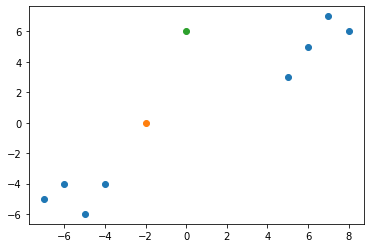

In [18]:
#Your CODE HERE
Xpair = [(-7, -5), (8, 6), (-4, -4), (5, 3), (-6, -4), (6, 5), (-5, -6), (7, 7)]
X = [x  for x,y in Xpair]
Y = [y  for x,y in Xpair]
centroids = [(-2, 0), (0,6)] #Arbitrarily chose two centroids and generated it on the plot (#2)
print(Xpair) 
plt.scatter(X, Y) #Generate image of all the data points (#1)
Xcentroid = [x for x,y in centroids]
Ycentroid = [y for x,y in centroids]
plt.scatter(-2, 0)
plt.scatter(0, 6)

from scipy.spatial.distance import cdist
# use cdist for euclidean distance function

def assign_clusters(all_points, centroid1, centroid2):
    cluster1 = [] # create lists for centroid 1 and 2 clusters
    cluster2 = []
    cent1, cent2 = centroids
    for pair in Xpair: # loop through Xpair pairs
        dist1 = cdist([cent1], [pair]) # for each pair find distance to centroid 1 and 2 (#3)
        dist2 = cdist([cent2], [pair])
        if dist1 < dist2: # assign pair to centroid list with the lowest distance (#3)
            cluster1.append(pair)
        else:
            cluster2.append(pair)
    return cluster1, cluster2
print('Cluster1:', cluster1)
print('Cluster2:', cluster2)

#4 Generate new image of all the data points and the two centroids, distinguish the group by using different color (BELOW)
#5 Realign the centroids to center of the groups and generate it on the image. (BELOW)
#6 Repeat 3.4.5. until converge. (BELOW)
# #4,5,6 BELOW:

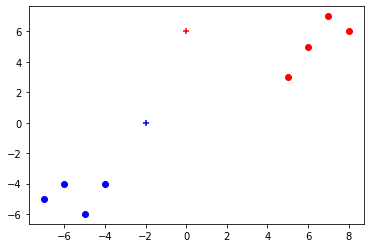

In [19]:
x1 = [x for x,y in cluster1]
y1 = [y for x,y in cluster1]
x2 = [x for x,y in cluster2]
y2 = [y for x,y in cluster2]
plt.scatter(x1,y1, c='b') #Generate image of all data points and the two centroids, distinguish the group (#4)
plt.scatter(x2,y2, c='r')
plt.scatter(-2, 0, c='b', marker='+')
plt.scatter(0, 6, c='r', marker='+')

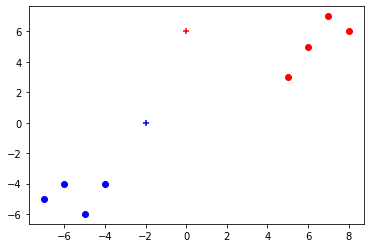

C1: (-5.5, -4.75) C2: (6.5, 5.25)


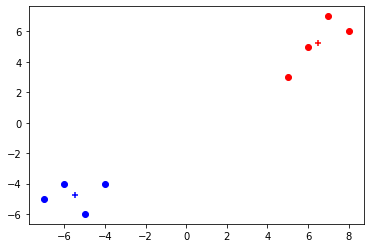

C1: (-5.5, -4.75) C2: (6.5, 5.25)


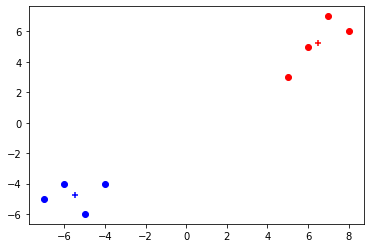

In [32]:
def find_center(cluster): #Initialize callable function to Realign centroids to center of groups and generate it on image (#5)
    X = [x for x,y in cluster]
    Y = [y for x,y in cluster]
    x_center = sum(X) / len(X)
    y_center = sum(Y) / len(Y)
    return (x_center, y_center)

def plot_clusters(cluster1, cluster2, centroid1, centroid2): 
    #Initialize callable function to plot each point within the clusters and centroids and generate it on the image (#5)
    x1 = [x for x,y in cluster1] 
    y1 = [y for x,y in cluster1]
    x2 = [x for x,y in cluster2]
    y2 = [y for x,y in cluster2]
    plt.scatter(x1,y1, c='b')
    plt.scatter(x2,y2, c='r')
    xc1, yc1 = centroid1
    xc2, yc2 = centroid2
    plt.scatter(xc1, yc1, c='b', marker='+')
    plt.scatter(xc2, yc2, c='r', marker='+')

all_points = Xpair 
centroid1 = (-2,0)
centroid2 = (0, 6)
plot_clusters(cluster1, cluster2, centroid1, centroid2) #Start (#6) by showing the original plot locations
plt.show()
previous_centroid1 = centroid1
previous_centroid2 = centroid2

while True:
    cluster1, cluster2 = assign_clusters(all_points, centroid1, centroid2) #Repeat 3.4.5. until converge (#6)
    centroid1 = find_center(cluster1)
    centroid2 = find_center(cluster2)
    print('C1:', centroid1, 'C2:', centroid2)
    plot_clusters(cluster1, cluster2, centroid1, centroid2)
    plt.show()
    if centroid1 == previous_centroid1 and centroid2 == previous_centroid2: 
        break #Once it doesn't converge/move anymore it breaks out (we see two similiar plots so the loop stops) (#6)
    previous_centroid1, previous_centroid2 = centroid1, centroid2

Use built-in k-means function to generate the centroids and verify your output from previous step.

In [35]:
# Your CODE HERE
km = KMeans (n_clusters=2, init='k-means++')
clstrs = km.fit (Xpair)
print (clstrs.cluster_centers_.shape)
print (clstrs.cluster_centers_)

(2, 2)
[[ 6.5   5.25]
 [-5.5  -4.75]]
